In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.configreader as configreader

#main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/hydrosmotic_hydraulic/versus/N1000_hydraulic/'
main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/'

mu = (np.sin(np.pi/3.))**2 / (2*np.pi/3. - np.sin(2*np.pi/3.))


In [2]:
subdir = 'tests/new'
path = os.path.join(main_dir, subdir)
conf, ch = chain.load_config(os.path.join(path, 'config.conf'))


Import successful !


IndexError: index 3 is out of bounds for axis 1 with size 3

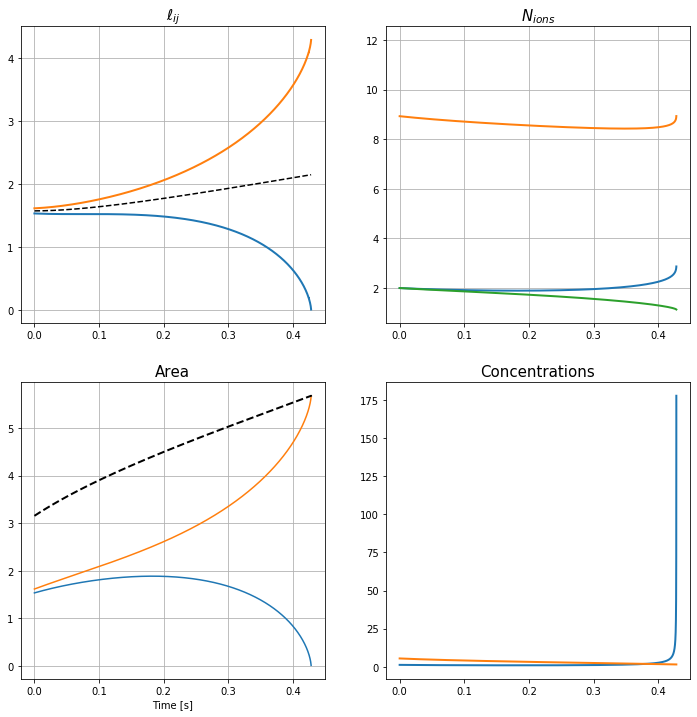

In [22]:
L, nion, pos = tools.load_file(os.path.join(path, 'sim_all.dat'), hydroosmotic=True)
ell = tools.load_brfile(os.path.join(path, 'sim_bridges.dat'))
show_area=True
savefig=False
x_log = 0
y_log = 0
tools.plot_evolution(L, ell, nion, savename='', show_totalarea=show_area, savefig=savefig, x_logscale=x_log, y_logscale=y_log, figsize=(12, 12))


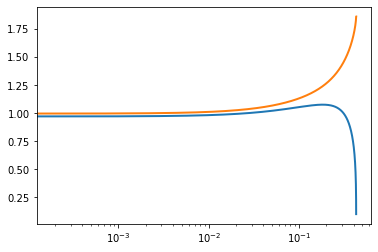

In [52]:
plt.xscale('log')
for k in range(1, len(L[0])) :
    plt.plot(L[:, 0], L[:, k], linewidth=2)

In [16]:
filename = '/Users/mathieuleverge/git/chain_lumen/_data/tests/new/distrib_length.dat'
data = np.genfromtxt(filename, skip_footer=3)

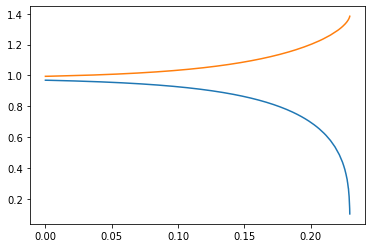

In [17]:
plt.plot(data[:, 0], data[:, 1])
plt.plot(data[:, 0], data[:, 2])

In [55]:
from scipy.integrate import quad
from scipy.integrate import solve_bvp
from scipy.integrate import RK45

In [108]:
def g(z, C=27./10., zmax=9./4) :
    try :
        res = np.zeros(z.size)
        for i in range(len(z)) :
            if z[i] > 0. and z[i] < zmax :
                res[i] = (5*C-8*z[i]**1.5)/(4*z[i]**2.5+10*C*z[i]*(1-np.sqrt(z[i])))
        return res
    except :
        if z > 0 and z < zmax :
            return (5*C-8*z**1.5)/(4*z**2.5+10*C*z*(1-np.sqrt(z)))
        else :
            return 0.
        

    
def dfdz(z, f) :
    return g(z)*f

def bc(za, zb) :
    return np.array([za[0], zb[0]])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


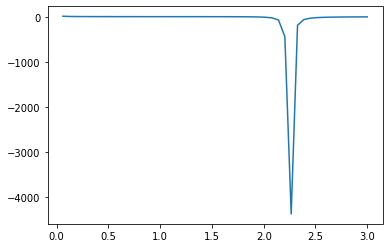

In [109]:
z = np.linspace(0., 3)
plt.plot(z, [g(z[i]) for i in range(len(z))])

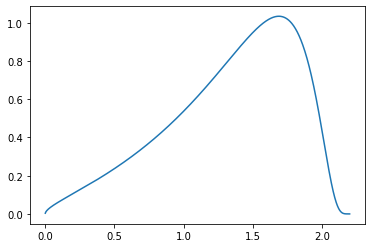

In [155]:
def g(z, C=27./10., zmax=9./4) :
        return (5*C-8*z**1.)/(4*z**2.5+10*C*z*(1-np.sqrt(z)))
    
def calc_fz(z, dz, z0=1e-6) :    
    sol = [z0]
    for i in range(1, len(z)) :
        sol += [sol[i-1] + dz*g(z[i-1])*sol[i-1]]
    
    Z = np.sum(sol)
    sol = np.array(sol) / Z
    return sol

z = np.linspace(1e-3, 2.2, 1000)
dz = z[1]-z[0]
sol = calc_fz(z, dz)

plt.plot(z, sol*500)